In [2]:
%pylab
import pysim.epcstd as gen2
import pysim.models as mds
import pysim.simulator as sim
from pysim.models import modelParams, KMPH_TO_MPS_MUL
import itertools

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


## Simulation setup

In [3]:
modelParams.delim = 12.5e-6         # sec.
modelParams.tari = 6.25e-6          # sec.
modelParams.rtcal_tari_mul = 3.0    # used when _rtcal is None, 2.5 <= x <= 3.0
modelParams.trcal_rtcal_mul = 2.5   # used when _trcal is None, 1.1 <= x <= 3.0
modelParams.temp = gen2.TempRange.NOMINAL

modelParams.speed = 60 * KMPH_TO_MPS_MUL                # meters per second
modelParams.initial_distance_to_reader = 15.0           # meters
modelParams.travel_distance = 30.0                      # meters
modelParams.lanes_num = 1                               # 1 or 2
modelParams.lane_width = 3.5                            # meters
modelParams.reader_antenna_sides = ['front', 'back']
modelParams.reader_antenna_height = 5.0                 # meters (z-axis)
modelParams.reader_antenna_offset = 1.0                 # meters (x-axis)
modelParams.tag_antenna_height = 0.5                    # meters (z-axis)

modelParams.tag_orientation = 'front'                   # 'front' or 'back'
modelParams.update_interval = 0.01                      # sec.

# Energy settings
modelParams.reader_power = 31.5                         # dBm
modelParams.reader_antenna_gain = 6.0                   # dB
modelParams.reader_cable_loss = -2.0                    # dB
modelParams.tag_antenna_gain = 3.0                      # dB
modelParams.tag_modulation_loss = -12.0                 # dB
modelParams.tag_sensitivity = -18.0                     # dBm
modelParams.reader_noise = -80.0                        # dBm
    
# Medium settings
modelParams.ber_distribution = 'rayleigh'               # 'rayleigh' or 'awgn'
modelParams.frequency = 860 * 1e6                       # MHz
modelParams.permittivity = 15.0                         # for ground reflection
modelParams.conductivity = 0.03                         # for ground reflection
modelParams.polarization_loss = -3.0                    # dB
modelParams.ground_reflection_type = 'reflection'       # 'reflection' or 'const'

# Reader power control and antennas switching
modelParams.reader_switch_power = True
modelParams.reader_power_on_duration = 2.0              # sec.
modelParams.reader_power_off_duration = 0.1             # sec.
modelParams.reader_antenna_switching_interval = 0.1     # sec.
modelParams.reader_always_start_with_first_antenna = False
modelParams.reader_antenna_angle = np.pi / 4.0

# Inventory settings
modelParams.read_tid_bank = True
modelParams.read_tid_words_num = 32
modelParams.q = 2
modelParams.tag_encoding = gen2.TagEncoding.M4
modelParams.dr = gen2.DivideRatio.DR_8
modelParams.sel = gen2.SelFlag.ALL
modelParams.session = gen2.Session.S0
modelParams.target = gen2.InventoryFlag.A
modelParams.trext = True
modelParams.target_strategy = "const"
modelParams.rounds_per_target = 1

# Tag internal settings
modelParams.epc_bitlen = 96
modelParams.tid_bitlen = 64
modelParams.s1_persistence = 2.0                        # sec.
modelParams.s2_persistence = 2.0                        # sec.
modelParams.s3_persistence = 2.0                        # sec.

# Generator settings
modelParams.generation_interval = (lambda: 0.5, )
modelParams.max_tags_simulated = 5

# Statistics
modelParams.collect_power_statistics = False

# Tags and vehicles identification probability

In [74]:
modelParams.tag_orientation = 'front'
modelParams.reader_antenna_angle = pi/6
modelParams.reader_antenna_sides = ['front', 'back']
modelParams.dr = gen2.DivideRatio.DR_8
modelParams.q = 2
modelParams.trext = True
modelParams.target_strategy = 'switch'
modelParams.rounds_per_target = 1
modelParams.max_tags_simulated = 250

speed = [60.0, 80.0, 100.0, 120.0, 140.0, 160.0]

def estimate_rates(speed, tari, encoding, orientation):
    ret = []
    for v in speed:
        print("* estimating speed = {} kmph".format(v))
        for t, m, o in itertools.product(tari, encoding, orientation):
            result = mds.simulate_tags(speed=(v * KMPH_TO_MPS_MUL), encoding=m, tari=t, orientation=o,
                                       log_level=sim.Logger.Level.WARNING)
            result['m'] = m.name
            result['tari'] = t
            result['speed'] = v
            result['orientation'] = o
            ret.append(result)
    return ret

print("====\nESTIMATING STATS FOR DIFFERENT ENCODINGS WITH TARI=12.5e-06\n====")
encoding_varying_stats = estimate_rates(speed=speed, 
                                        tari=[12.5e-06], 
                                        encoding=[gen2.TagEncoding.M2, gen2.TagEncoding.M4, gen2.TagEncoding.M8], 
                                        orientation=['front', 'back'])

print("====\nESTIMATING STATS FOR DIFFERENT TARIS WITH ENCODING=M4\n====")
tari_varying_stats = estimate_rates(speed=speed, 
                                    tari=[6.25e-06, 25e-06], 
                                    encoding=[gen2.TagEncoding.M4], 
                                    orientation=['front', 'back'])


====
ESTIMATING STATS FOR DIFFERENT ENCODINGS WITH TARI=12.5e-06
====
* estimating speed = 60.0 kmph
* estimating speed = 70.0 kmph
* estimating speed = 80.0 kmph
* estimating speed = 90.0 kmph
* estimating speed = 100.0 kmph
* estimating speed = 110.0 kmph
* estimating speed = 120.0 kmph
* estimating speed = 130.0 kmph
* estimating speed = 140.0 kmph
* estimating speed = 150.0 kmph
====
ESTIMATING STATS FOR DIFFERENT TARIS WITH ENCODING=M4
====
* estimating speed = 60.0 kmph
* estimating speed = 70.0 kmph
* estimating speed = 80.0 kmph
* estimating speed = 90.0 kmph
* estimating speed = 100.0 kmph
* estimating speed = 110.0 kmph
* estimating speed = 120.0 kmph
* estimating speed = 130.0 kmph
* estimating speed = 140.0 kmph
* estimating speed = 150.0 kmph


In [64]:
print(tari_varying_stats)




[{'rounds_per_tag': 22.989999999999998, 'inventory_prob': 0.92, 'read_tid_prob': 0.75, 'm': 'M4', 'tari': 6.25e-06, 'speed': 60.0, 'orientation': 'front'}, {'rounds_per_tag': 22.649999999999999, 'inventory_prob': 0.96, 'read_tid_prob': 0.73, 'm': 'M4', 'tari': 6.25e-06, 'speed': 60.0, 'orientation': 'back'}, {'rounds_per_tag': 5.4299999999999997, 'inventory_prob': 0.98, 'read_tid_prob': 0.81, 'm': 'M4', 'tari': 2.5e-05, 'speed': 60.0, 'orientation': 'front'}, {'rounds_per_tag': 5.2199999999999998, 'inventory_prob': 0.96, 'read_tid_prob': 0.81, 'm': 'M4', 'tari': 2.5e-05, 'speed': 60.0, 'orientation': 'back'}, {'rounds_per_tag': 17.940000000000001, 'inventory_prob': 0.86, 'read_tid_prob': 0.63, 'm': 'M4', 'tari': 6.25e-06, 'speed': 80.0, 'orientation': 'front'}, {'rounds_per_tag': 16.43, 'inventory_prob': 0.91, 'read_tid_prob': 0.63, 'm': 'M4', 'tari': 6.25e-06, 'speed': 80.0, 'orientation': 'back'}, {'rounds_per_tag': 4.29, 'inventory_prob': 0.91, 'read_tid_prob': 0.56, 'm': 'M4', 'tar

In [124]:
# Plotting for different encodings
fixed_tari_epc_back_probs = {}
fixed_tari_epc_front_probs = {}
fixed_tari_tid_back_probs = {}
fixed_tari_tid_front_probs = {}
fixed_tari_vehicle_probs = {}
for m in [gen2.TagEncoding.M2, gen2.TagEncoding.M4, gen2.TagEncoding.M8]:
    fixed_tari_epc_back_probs[m] = [r['inventory_prob'] for r in encoding_varying_stats 
                                    if r['m'] == m.name and r['orientation'] == 'back']
    fixed_tari_epc_front_probs[m] = [r['inventory_prob'] for r in encoding_varying_stats 
                                    if r['m'] == m.name and r['orientation'] == 'front']
    fixed_tari_tid_back_probs[m] = [r['read_tid_prob'] for r in encoding_varying_stats 
                                    if r['m'] == m.name and r['orientation'] == 'back']
    fixed_tari_tid_front_probs[m] = [r['read_tid_prob'] for r in encoding_varying_stats 
                                    if r['m'] == m.name and r['orientation'] == 'front']
    fixed_tari_vehicle_probs[m] = [1 - (1 - rb) * (1 - rf) 
                                   for rb, rf in zip(fixed_tari_tid_back_probs[m], 
                                                     fixed_tari_tid_front_probs[m])]
    
fixed_m_epc_back_probs = {}
fixed_m_epc_front_probs = {}
fixed_m_tid_back_probs = {}
fixed_m_tid_front_probs = {}
fixed_m_vehicle_probs = {}

fixed_m_epc_back_probs['6.25'] = [r['inventory_prob'] for r in tari_varying_stats
                                  if abs(r['tari'] - 6.25e-06) < 1e-6 and r['orientation'] == 'back']
fixed_m_epc_back_probs['12.5'] = [r['inventory_prob'] for r in encoding_varying_stats
                                  if r['m'] == 'M4' and r['orientation'] == 'back']
fixed_m_epc_back_probs['25.0'] = [r['inventory_prob'] for r in tari_varying_stats
                                if abs(r['tari'] - 25e-06) < 1e-6 and r['orientation'] == 'back']
fixed_m_epc_front_probs['6.25'] = [r['inventory_prob'] for r in tari_varying_stats
                                   if abs(r['tari'] - 6.25e-06) < 1e-6 and r['orientation'] == 'front']
fixed_m_epc_front_probs['12.5'] = [r['inventory_prob'] for r in encoding_varying_stats
                                   if r['m'] == 'M4' and r['orientation'] == 'front']
fixed_m_epc_front_probs['25.0'] = [r['inventory_prob'] for r in tari_varying_stats
                                   if abs(r['tari'] - 25e-06) < 1e-6 and r['orientation'] == 'front']
fixed_m_tid_back_probs['6.25'] = [r['read_tid_prob'] for r in tari_varying_stats
                                  if abs(r['tari'] - 6.25e-06) < 1e-6 and r['orientation'] == 'back']
fixed_m_tid_back_probs['12.5'] = [r['read_tid_prob'] for r in encoding_varying_stats
                                  if r['m'] == 'M4' and r['orientation'] == 'back']
fixed_m_tid_back_probs['25.0'] = [r['read_tid_prob'] for r in tari_varying_stats
                                if abs(r['tari'] - 25e-06) < 1e-6 and r['orientation'] == 'back']
fixed_m_tid_front_probs['6.25'] = [r['read_tid_prob'] for r in tari_varying_stats
                                   if abs(r['tari'] - 6.25e-06) < 1e-6 and r['orientation'] == 'front']
fixed_m_tid_front_probs['12.5'] = [r['read_tid_prob'] for r in encoding_varying_stats
                                   if r['m'] == 'M4' and r['orientation'] == 'front']
fixed_m_tid_front_probs['25.0'] = [r['read_tid_prob'] for r in tari_varying_stats
                                   if abs(r['tari'] - 25e-06) < 1e-6 and r['orientation'] == 'front']
for k in ['6.25', '12.5', '25.0']:
    fixed_m_vehicle_probs[k] = [1 - (1 - rb) * (1 - rf)
                                for rb, rf in zip(fixed_m_tid_back_probs[k], fixed_m_tid_front_probs[k])]

print(fixed_m_epc_front_probs)
print(fixed_m_epc_back_probs)
print(fixed_m_tid_front_probs)
print(fixed_m_tid_back_probs)
print(fixed_m_vehicle_probs)



{'6.25': [0.935, 0.915, 0.9, 0.91, 0.86, 0.85, 0.815, 0.755, 0.63, 0.715], '12.5': [0.945, 0.93, 0.92, 0.955, 0.93, 0.88, 0.815, 0.79, 0.73, 0.695], '25.0': [0.965, 0.96, 0.915, 0.94, 0.88, 0.835, 0.83, 0.8, 0.65, 0.695]}
{'6.25': [0.96, 0.94, 0.92, 0.9, 0.86, 0.82, 0.855, 0.825, 0.655, 0.8], '12.5': [0.975, 0.94, 0.955, 0.935, 0.93, 0.865, 0.875, 0.845, 0.71, 0.825], '25.0': [0.96, 0.97, 0.96, 0.95, 0.91, 0.83, 0.84, 0.835, 0.675, 0.79]}
{'6.25': [0.71, 0.69, 0.72, 0.67, 0.52, 0.59, 0.57, 0.365, 0.38, 0.35], '12.5': [0.79, 0.73, 0.755, 0.655, 0.655, 0.57, 0.515, 0.535, 0.375, 0.37], '25.0': [0.805, 0.73, 0.635, 0.61, 0.45, 0.53, 0.485, 0.35, 0.315, 0.305]}
{'6.25': [0.765, 0.72, 0.695, 0.62, 0.58, 0.55, 0.565, 0.51, 0.385, 0.455], '12.5': [0.8, 0.78, 0.76, 0.75, 0.62, 0.58, 0.53, 0.505, 0.39, 0.485], '25.0': [0.795, 0.715, 0.67, 0.605, 0.515, 0.515, 0.37, 0.435, 0.32, 0.305]}
{'6.25': [0.93185, 0.9132, 0.9146, 0.8746, 0.7984, 0.8155, 0.81295, 0.68885, 0.6187, 0.64575], '12.5': [0.958,

<IPython.core.display.Javascript object>


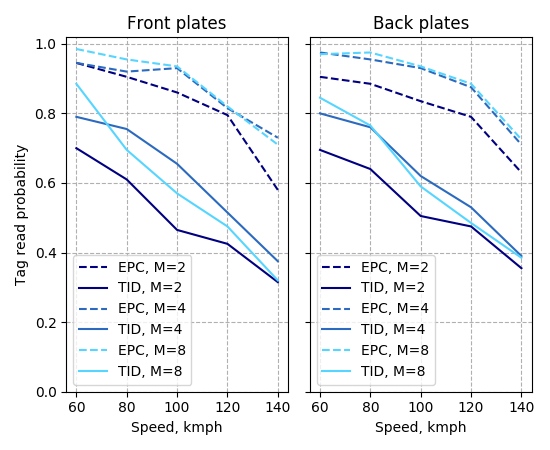

In [167]:
%matplotlib notebook

# nplot = 3
# color = lambda i: (i/(nplot-1)/3, i/(nplot-1)/1.2, (i+2)/(nplot+1))

# f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(5.5,7.5))
# ax1.set_title('Front plates')
# ax2.set_title('Back plates')
# ax3.set_title('Vehicle identification by TID')
# color_offset = 0
# for m in [gen2.TagEncoding.M2, gen2.TagEncoding.M4, gen2.TagEncoding.M8]:
#     ax1.plot(speed[:-2], fixed_tari_epc_front_probs[m][:-2], '--', color=color(0 + color_offset), 
#              label='EPC, M={}'.format(m.symbols_per_bit))
#     ax1.plot(speed[:-2], fixed_tari_tid_front_probs[m][:-2], color=color(0 + color_offset), 
#              label='TID, M={}'.format(m.symbols_per_bit))
#     ax2.plot(speed[:-2], fixed_tari_epc_back_probs[m][:-2], '--', color=color(0 + color_offset), 
#              label='EPC, M={}'.format(m.symbols_per_bit))
#     ax2.plot(speed[:-2], fixed_tari_tid_back_probs[m][:-2], color=color(0 + color_offset), 
#              label='TID, M={}'.format(m.symbols_per_bit))
#     ax3.plot(speed[:-2], fixed_tari_epc_front_probs[m][:-2], color=color(color_offset),
#              label='M={}'.format(m.symbols_per_bit))
#     color_offset += 1

# ax1.set_ybound(lower=0.)
# ax2.set_ybound(lower=0.)    
# ax1.legend(ncol=3)
# ax2.legend(ncol=3)
# ax3.legend()
# ax1.grid(linestyle='--')
# ax2.grid(linestyle='--')
# ax3.grid(linestyle='--')
# plt.tight_layout()
# plt.show()

nplot = 3
color = lambda i: (i/(nplot-1)/3, i/(nplot-1)/1.2, (i+2)/(nplot+1))

f, (ax1, ax2, ) = plt.subplots(1, 2, sharey=True, figsize=(5.5,4.5))
ax1.set_title('Front plates')
ax2.set_title('Back plates')
ax3.set_title('Vehicle identification by TID')
color_offset = 0
for m in [gen2.TagEncoding.M2, gen2.TagEncoding.M4, gen2.TagEncoding.M8]:
    ax1.plot(speed[::2], fixed_tari_epc_front_probs[m][::2], '--', color=color(0 + color_offset), 
             label='EPC, M={}'.format(m.symbols_per_bit))
    ax1.plot(speed[::2], fixed_tari_tid_front_probs[m][::2], color=color(0 + color_offset), 
             label='TID, M={}'.format(m.symbols_per_bit))
    ax2.plot(speed[::2], fixed_tari_epc_back_probs[m][::2], '--', color=color(0 + color_offset), 
             label='EPC, M={}'.format(m.symbols_per_bit))
    ax2.plot(speed[::2], fixed_tari_tid_back_probs[m][::2], color=color(0 + color_offset), 
             label='TID, M={}'.format(m.symbols_per_bit))
    color_offset += 1

ax1.set_ybound(lower=0.)
ax2.set_ybound(lower=0.)    
ax1.legend(ncol=1)
ax2.legend(ncol=1)
# ax3.legend()
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
ax1.set_xlabel('Speed, kmph')
ax2.set_xlabel('Speed, kmph')
ax1.set_ylabel('Tag read probability')
# ax3.grid(linestyle='--')
plt.tight_layout()
plt.show()

plt.savefig('img/tag_identification_tari125.eps')


<IPython.core.display.Javascript object>


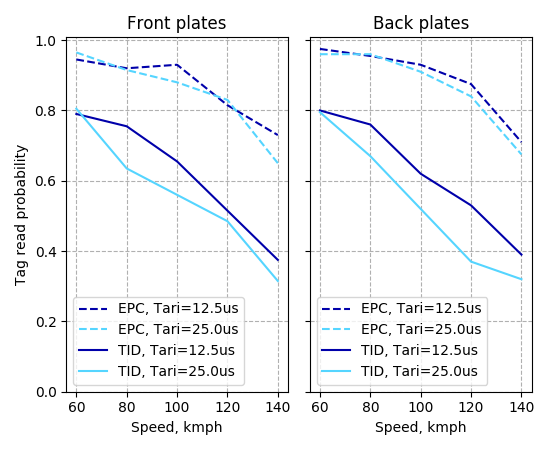

In [166]:
nplot = 2
color = lambda i: (i/(nplot-1)/3, i/(nplot-1)/1.2, (i+2)/(nplot+1))

f, (ax1, ax2, ) = plt.subplots(1, 2, sharey=True, figsize=(5.5,4.5))
ax1.set_title('Front plates')
ax2.set_title('Back plates')
color_offset = 0

# Front plates

ax1.plot([speed[i] for i in (0, 2, 4, 6, 8)], 
         [fixed_m_epc_front_probs['12.5'][i] for i in (0, 2, 4, 6, 8)], 
         '--', color=color(0), 
         label='EPC, Tari=12.5us')

ax1.plot([speed[i] for i in (0, 2, 4, 6, 8)], 
         [fixed_m_epc_front_probs['25.0'][i] for i in (0, 2, 4, 6, 8)], 
         '--', color=color(1), 
         label='EPC, Tari=25.0us')

ax1.plot([speed[i] for i in (0, 2, 4, 6, 8)], 
         [fixed_m_tid_front_probs['12.5'][i] for i in (0, 2, 4, 6, 8)],
         color=color(0), 
         label='TID, Tari=12.5us')

ax1.plot([speed[i] for i in (0, 2, 6, 8)], 
         [fixed_m_tid_front_probs['25.0'][i] for i in (0, 2, 6, 8)],
         color=color(1), 
         label='TID, Tari=25.0us')

# Back plates

ax2.plot([speed[i] for i in (0, 2, 4, 6, 8)], 
         [fixed_m_epc_back_probs['12.5'][i] for i in (0, 2, 4, 6, 8)], 
         '--', color=color(0), 
         label='EPC, Tari=12.5us')

ax2.plot([speed[i] for i in (0, 2, 4, 6, 8)], 
         [fixed_m_epc_back_probs['25.0'][i] for i in (0, 2, 4, 6, 8)], 
         '--', color=color(1), 
         label='EPC, Tari=25.0us')

ax2.plot([speed[i] for i in (0, 2, 4, 6, 8)], 
         [fixed_m_tid_back_probs['12.5'][i] for i in (0, 2, 4, 6, 8)],
         color=color(0), 
         label='TID, Tari=12.5us')

ax2.plot([speed[i] for i in (0, 2, 6, 8)], 
         [fixed_m_tid_back_probs['25.0'][i] for i in (0, 2, 6, 8)],
         color=color(1), 
         label='TID, Tari=25.0us')

# ax2.plot(speed[::2], fixed_m_epc_back_probs[k][::2], '--', color=color(color_offset), 
#          label='EPC, Tari={}us'.format(k))
# ax2.plot([speed[i] for i in (0, 2, 4, 6, 8)], 
#          [fixed_m_tid_back_probs[k][i] for i in (0, 2, 4, 6, 8)], 
#          color=color(color_offset), 
#          label='TID, Tari={}us'.format(k))
#     color_offset += 1

ax1.set_ybound(lower=0.)
ax2.set_ybound(lower=0.)    
ax1.legend(ncol=1)
ax2.legend(ncol=1)
# ax3.legend()
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
# ax3.grid(linestyle='--')
ax1.set_xlabel('Speed, kmph')
ax2.set_xlabel('Speed, kmph')
ax1.set_ylabel('Tag read probability')
plt.tight_layout()
plt.show()

plt.savefig('img/tag_identification_m4.eps')
# ax3.set_title('Vehicle identification by TID')
#     ax3.plot(speed, fixed_m_epc_front_probs[k], label='Tari={}us'.format(k))


<IPython.core.display.Javascript object>


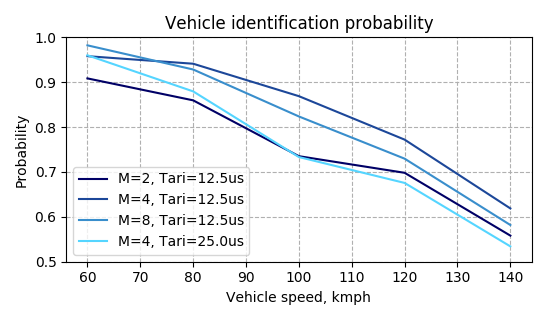

In [151]:
nplot = 4
color = lambda i: (i/(nplot-1)/3, i/(nplot-1)/1.2, (i+2)/(nplot+1))

plt.figure(figsize=(5.5, 3.2))
plt.plot(speed[::2], fixed_tari_vehicle_probs[gen2.TagEncoding.M2][::2], color=color(0), label='M=2, Tari=12.5us')
plt.plot(speed[::2], fixed_tari_vehicle_probs[gen2.TagEncoding.M4][::2], color=color(1), label='M=4, Tari=12.5us')
plt.plot(speed[::2], fixed_tari_vehicle_probs[gen2.TagEncoding.M8][::2], color=color(2), label='M=8, Tari=12.5us')
plt.plot(speed[::2], fixed_m_vehicle_probs['25.0'][::2], color=color(3), label='M=4, Tari=25.0us')

plt.grid(linestyle='--')
plt.ylim((0.5, 1.0))
# plt.xlim((0.0, 0.5))

plt.title("Vehicle identification probability")
plt.ylabel('Probability')
plt.xlabel('Vehicle speed, kmph')

plt.legend()
plt.tight_layout()
plt.savefig('img/vehicle_identification_rate.eps')


# Num rounds vs switch interval

In [5]:
intervals = arange(50) * 0.01 + 0.01

two_antennas_s0_const = []
two_antennas_s0_switch = []
one_antenna_s0_const = []
one_antenna_s0_switch = []

modelParams.speed = 60.0 * KMPH_TO_MPS_MUL
modelParams.tag_encoding = gen2.TagEncoding.M4
modelParams.tari = 18.75e-06
modelParams.tag_orientation = 'front'
modelParams.max_tags_simulated = 75

modelParams.reader_antenna_sides = ['front', 'back']

for interval in intervals:
    print("* 2 antennas, interval = {}".format(interval))

    result = mds.simulate_tags(target_strategy='const', 
                               antenna_switching_interval=interval,
                               log_level=sim.Logger.Level.WARNING)
    two_antennas_s0_const.append(result['rounds_per_tag'])

    result = mds.simulate_tags(target_strategy='switch', 
                               rounds_per_target=1, 
                               antenna_switching_interval=interval,
                               log_level=sim.Logger.Level.WARNING)
    two_antennas_s0_switch.append(result['rounds_per_tag'])

modelParams.reader_antenna_sides = ['front']

for interval in intervals:
    print("* 1 antenna, interval = {}".format(interval))

    result = mds.simulate_tags(target_strategy='const', 
                               antenna_switching_interval=interval,
                               log_level=sim.Logger.Level.WARNING)
    one_antenna_s0_const.append(result['rounds_per_tag'])

    result = mds.simulate_tags(target_strategy='switch',
                               rounds_per_target=1,
                               antenna_switching_interval=interval,
                               log_level=sim.Logger.Level.WARNING)
    one_antenna_s0_switch.append(result['rounds_per_tag'])

modelParams.reader_antenna_sides = ['front', 'back']

* 2 antennas, interval = 0.01
* 2 antennas, interval = 0.02
* 2 antennas, interval = 0.03
* 2 antennas, interval = 0.04
* 2 antennas, interval = 0.05
* 2 antennas, interval = 0.060000000000000005
* 2 antennas, interval = 0.06999999999999999
* 2 antennas, interval = 0.08
* 2 antennas, interval = 0.09
* 2 antennas, interval = 0.09999999999999999
* 2 antennas, interval = 0.11
* 2 antennas, interval = 0.12
* 2 antennas, interval = 0.13
* 2 antennas, interval = 0.14
* 2 antennas, interval = 0.15000000000000002
* 2 antennas, interval = 0.16
* 2 antennas, interval = 0.17
* 2 antennas, interval = 0.18000000000000002
* 2 antennas, interval = 0.19
* 2 antennas, interval = 0.2
* 2 antennas, interval = 0.21000000000000002
* 2 antennas, interval = 0.22
* 2 antennas, interval = 0.23
* 2 antennas, interval = 0.24000000000000002
* 2 antennas, interval = 0.25
* 2 antennas, interval = 0.26
* 2 antennas, interval = 0.27
* 2 antennas, interval = 0.28
* 2 antennas, interval = 0.29000000000000004
* 2 antenn

<IPython.core.display.Javascript object>


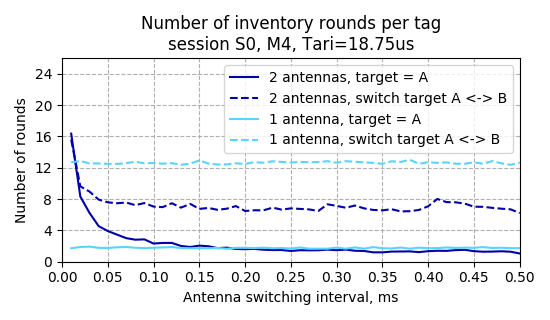

In [170]:
nplot = 2
color = lambda i: (i/(nplot-1)/3, i/(nplot-1)/1.2, (i+2)/(nplot+1))

plt.figure(figsize=(5.5, 3.2))

plt.plot(intervals, two_antennas_s0_const, color=color(0), label="2 antennas, target = A")
plt.plot(intervals, two_antennas_s0_switch, '--', color=color(0), label="2 antennas, switch target A <-> B")
plt.plot(intervals, one_antenna_s0_const, color=color(1), label="1 antenna, target = A")
plt.plot(intervals, one_antenna_s0_switch, '--', color=color(1), label="1 antenna, switch target A <-> B")

plt.grid(linestyle='--')
plt.ylim((0, 26))
plt.xlim((0.0, 0.5))

plt.title("Number of inventory rounds per tag\nsession S0, M4, Tari=18.75us")
plt.ylabel('Number of rounds')
plt.xlabel('Antenna switching interval, ms')
plt.xticks(arange(11) * 0.05)
plt.yticks(arange(7) * 4)

plt.legend()
plt.tight_layout()
plt.savefig('img/sessions.eps')

